In [1]:
import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
import numpy as np
import math
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 10)})
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\samhe\\OneDrive\\Documents\\IOD\\DATA\\Salary_Data.csv')

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [5]:
df.tail()

,age,gender,education_level,job_title,years_of_experience,salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6702 non-null   float64
 1   gender               6702 non-null   object 
 2   education_level      6701 non-null   object 
 3   job_title            6702 non-null   object 
 4   years_of_experience  6701 non-null   float64
 5   salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [7]:
#df['age'].astype('int')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6702 non-null   float64
 1   gender               6702 non-null   object 
 2   education_level      6701 non-null   object 
 3   job_title            6702 non-null   object 
 4   years_of_experience  6701 non-null   float64
 5   salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [9]:
df.dtypes.value_counts()

float64    3
object     3
Name: count, dtype: int64

In [10]:
df.isnull().sum()

age                    2
gender                 2
education_level        3
job_title              2
years_of_experience    3
salary                 5
dtype: int64

In [11]:
df['salary'].unique()

array([ 90000.,  65000., 150000.,  60000., 200000.,  55000., 120000.,
        80000.,  45000., 110000.,  75000., 140000., 130000.,  40000.,
       125000., 115000.,  35000., 180000., 190000.,  50000., 250000.,
       170000., 160000.,  85000.,  95000., 105000.,  70000., 100000.,
        30000., 135000., 220000., 175000., 185000.,     nan, 145000.,
       155000.,    350., 195000., 198000., 196000., 193000.,  92000.,
       165000., 162000., 197000., 142000., 182000., 210000.,    550.,
       122485., 169159., 187081., 166109.,  78354.,  90249., 132720.,
       161568., 127346., 120177.,  69032., 101332., 121450., 166375.,
       185119., 149217., 166512., 186963.,  75072., 163398., 103947.,
       179180., 175966., 190004., 152039.,  76742., 191790., 139398.,
        95845., 160976., 126753., 161393., 139817., 181714., 114776.,
       105725.,  52731., 106492.,  73895., 119836.,  99747., 168287.,
       115920., 128078.,  51265., 165919., 188651.,  55538., 193964.,
       104702., 1729

In [12]:
df[df['salary'].isnull()]

,age,gender,education_level,job_title,years_of_experience,salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [13]:
df.drop([172,260,3136,5247,6455], inplace= True)

In [14]:
df.isna().sum()

age                    0
gender                 0
education_level        1
job_title              0
years_of_experience    0
salary                 0
dtype: int64

In [15]:
df[df['education_level'].isnull()]

,age,gender,education_level,job_title,years_of_experience,salary
2011,27.0,Male,NaN,Developer,7.0,100000.0


In [16]:
df.drop([2011], inplace= True)

In [17]:
df.isna().sum()

age                    0
gender                 0
education_level        0
job_title              0
years_of_experience    0
salary                 0
dtype: int64

In [18]:
df['age']=df.age.astype('int')
df['salary'] = df.salary.astype('int')
df['years_of_experience'] = df.years_of_experience.astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  6698 non-null   int32 
 1   gender               6698 non-null   object
 2   education_level      6698 non-null   object
 3   job_title            6698 non-null   object
 4   years_of_experience  6698 non-null   int32 
 5   salary               6698 non-null   int32 
dtypes: int32(3), object(3)
memory usage: 287.8+ KB


In [20]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32,Male,Bachelor's,Software Engineer,5,90000
1,28,Female,Master's,Data Analyst,3,65000
2,45,Male,PhD,Senior Manager,15,150000
3,36,Female,Bachelor's,Sales Associate,7,60000
4,52,Male,Master's,Director,20,200000


In [21]:
df['salary'].describe()

count      6698.000000
mean     115329.253061
std       52789.792507
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: salary, dtype: float64

In [22]:
df.describe(include='all')

,age,gender,education_level,job_title,years_of_experience,salary
count,6698.000000,6698,6698,6698,6698.000000,6698.000000
unique,NaN,3,7,191,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3671,2265,518,NaN,NaN
mean,33.623022,NaN,NaN,NaN,8.094207,115329.253061
std,7.615784,NaN,NaN,NaN,6.061399,52789.792507
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


In [23]:
df['years_of_experience'].value_counts()

years_of_experience
2     610
3     602
1     552
4     522
6     438
8     425
5     399
9     380
7     352
11    320
12    294
14    253
16    242
13    209
10    192
15    129
18    126
0     121
19    121
17    106
20     61
22     47
21     42
23     37
25     24
24     19
28     16
29     12
27     11
32     10
26      7
30      6
33      6
31      5
34      2
Name: count, dtype: int64

In [24]:
df['years_of_experience'].unique()

array([ 5,  3, 15,  7, 20,  2, 12,  4,  1, 10, 18,  6, 14, 16,  0, 22, 19,
        9, 13, 11, 25, 21,  8, 17, 23, 24, 31, 30, 28, 33, 27, 34, 29, 26,
       32])

In [25]:
df.loc[df['gender']=='Other', 'gender']='Female'

In [26]:
genders = df['gender'].value_counts()
genders

gender
Male      3671
Female    3027
Name: count, dtype: int64

In [27]:
genders = df['gender'].value_counts()
genders

gender
Male      3671
Female    3027
Name: count, dtype: int64

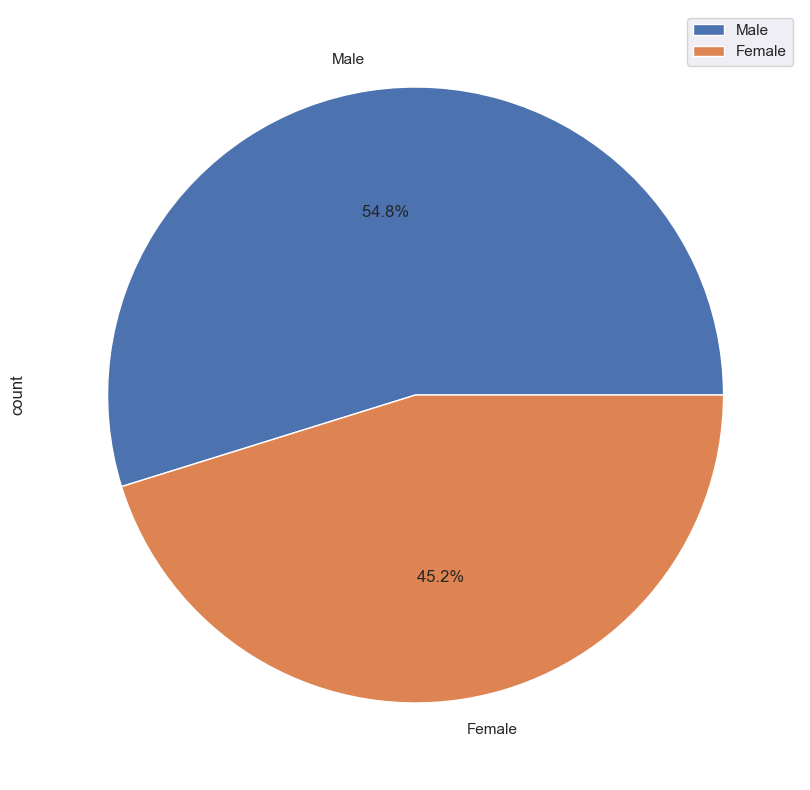

In [28]:
genders.plot.pie(autopct='%1.1f%% ', legend = True ) 
plt.legend(labels = genders.index, loc='upper right')
plt.show()

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


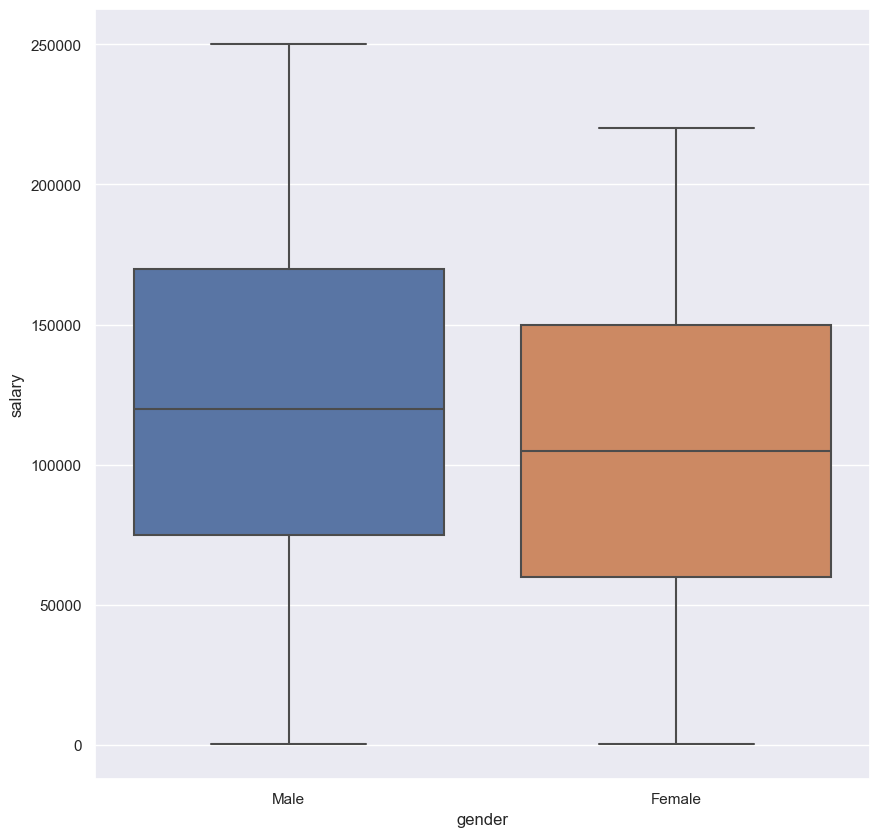

In [145]:
sns.boxplot(x='gender', y='salary',data =df);

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: xlabel='salary', ylabel='Count'>

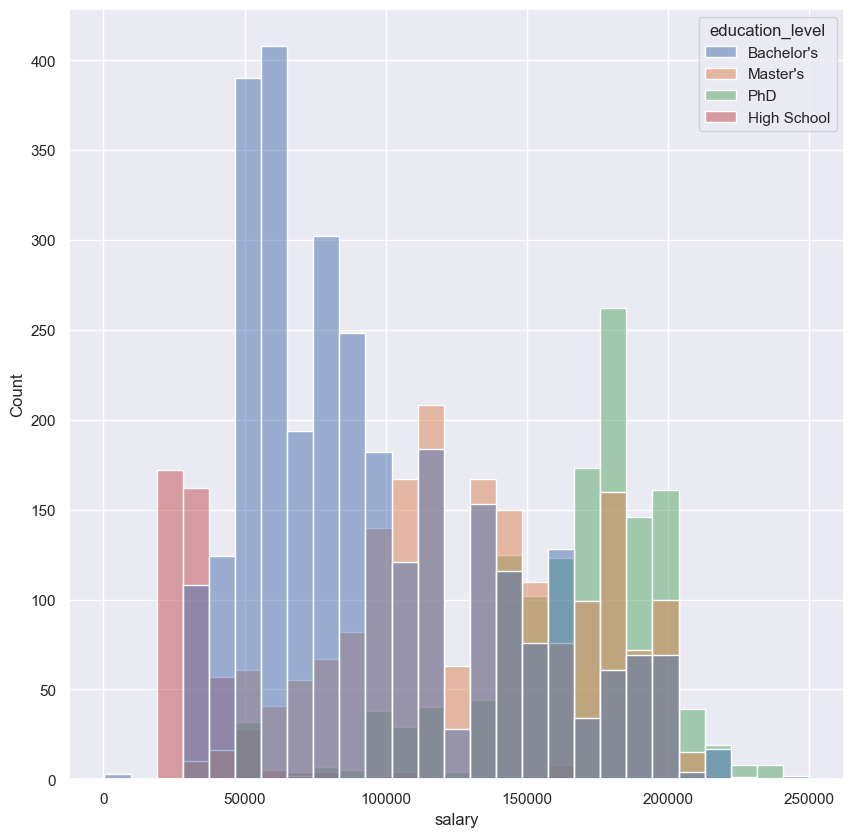

In [154]:
sns.histplot(x='salary',hue='education_level', data=df)

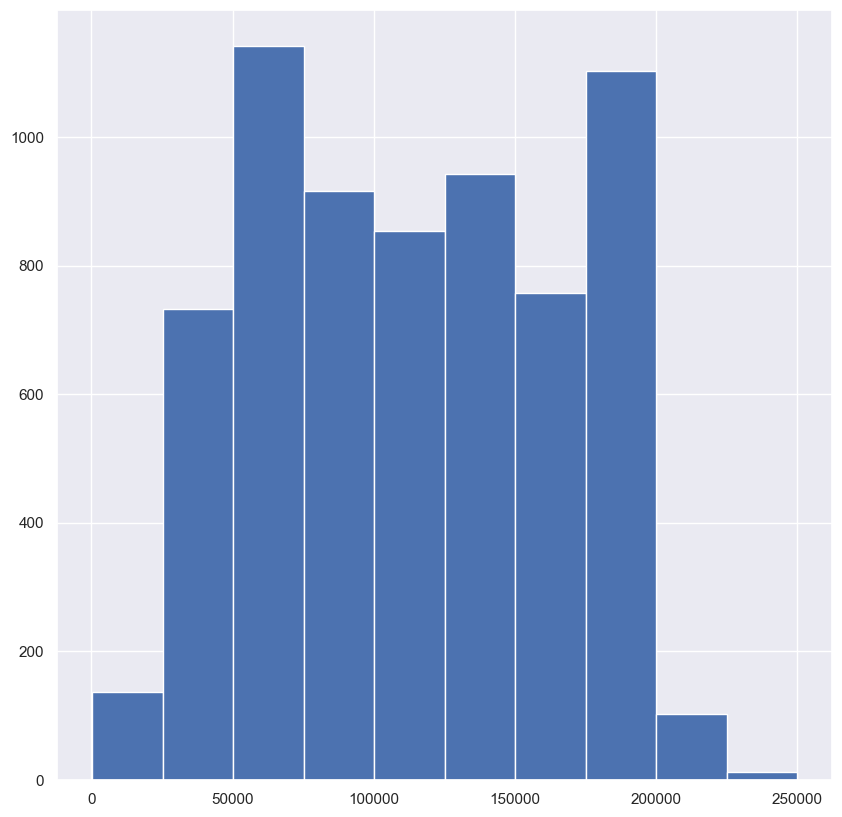

In [158]:
plt.hist(df.salary);

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='salary'>

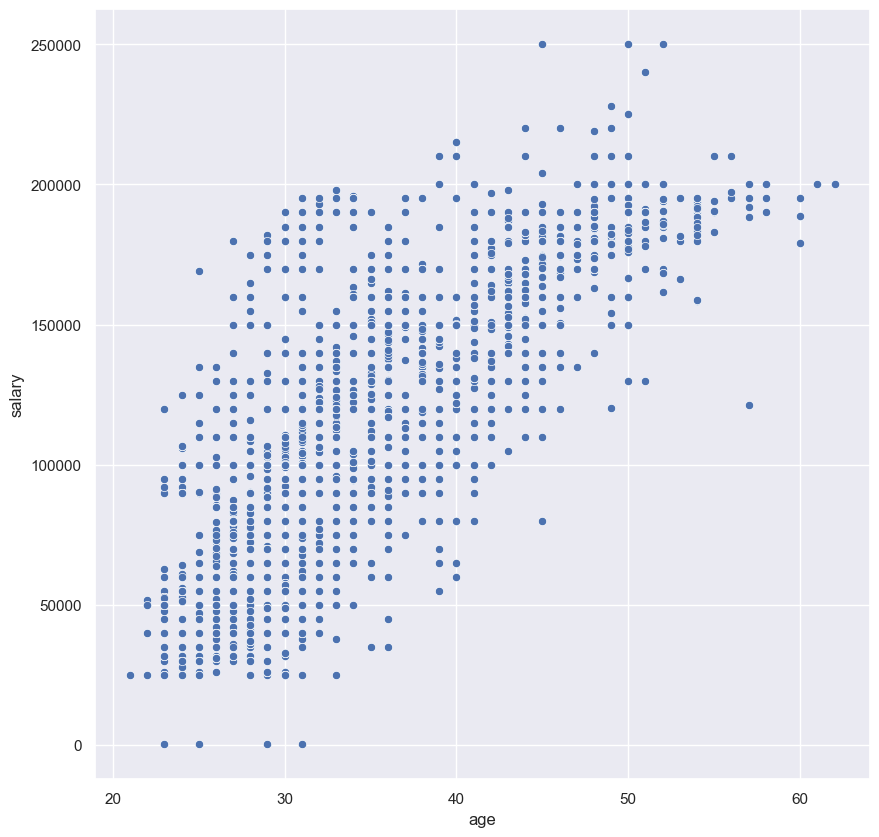

In [29]:
sns.scatterplot(x=df['age'],y= df['salary'])

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

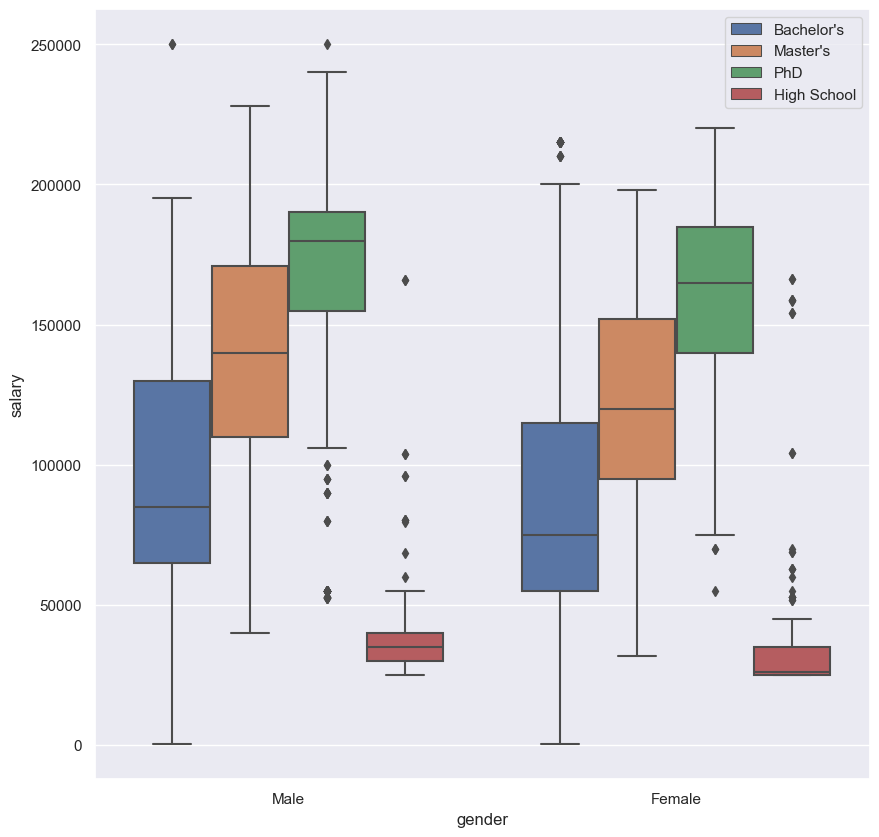

In [151]:
sns.boxplot(x='gender', y='salary', hue = 'education_level', data=df)
plt.legend(loc= 'upper right')

In [30]:
df[(df['salary']<40000) &(df['education_level']=='PhD')]

,age,gender,education_level,job_title,years_of_experience,salary
2654,23,Male,PhD,Software Engineer Manager,1,579
6335,24,Male,PhD,Digital Marketing Manager,1,30000


In [31]:
#df.drop([259,1890,2654,4633], inplace= True)

In [32]:
df.drop([6335], inplace= True)

In [33]:
df[df['salary']<10000]

,age,gender,education_level,job_title,years_of_experience,salary
259,29,Male,Bachelor's,Junior Business Operations Analyst,1,350
1890,25,Female,Bachelor's Degree,Front end Developer,1,550
2654,23,Male,PhD,Software Engineer Manager,1,579
4633,31,Female,Bachelor's Degree,Junior HR Coordinator,4,500


In [34]:
#is that correlation between gender and salary?
#use .map() to convert gender to numeric

In [35]:
df.salary.unique()

array([ 90000,  65000, 150000,  60000, 200000,  55000, 120000,  80000,
        45000, 110000,  75000, 140000, 130000,  40000, 125000, 115000,
        35000, 180000, 190000,  50000, 250000, 170000, 160000,  85000,
        95000, 105000,  70000, 100000,  30000, 135000, 220000, 175000,
       185000, 145000, 155000,    350, 195000, 198000, 196000, 193000,
        92000, 165000, 162000, 197000, 142000, 182000, 210000,    550,
       122485, 169159, 187081, 166109,  78354,  90249, 132720, 161568,
       127346, 120177,  69032, 101332, 121450, 166375, 185119, 149217,
       166512, 186963,  75072, 163398, 103947, 179180, 175966, 190004,
       152039,  76742, 191790, 139398,  95845, 160976, 126753, 161393,
       139817, 181714, 114776, 105725,  52731, 106492,  73895, 119836,
        99747, 168287, 115920, 128078,  51265, 165919, 188651,  55538,
       193964, 104702, 172955, 138032,  82683, 155414, 154207, 107895,
       148446, 102859, 138662, 181699, 188232,  51832, 188484, 138286,
      

In [36]:
df=df.dropna()

In [37]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [38]:
correlation_coefficient, p_value = pearsonr(df['salary'], df['gender'].map({'Male': 0,'Female':1}))
print(f'Pearson Correlation Coefficient: {correlation_coefficient} \n_P_value:{ p_value}')
                                                                           

Pearson Correlation Coefficient: -0.12681354730752165 
_P_value:2.0531371433517634e-25


In [39]:
df.corr(numeric_only = True)

,age,years_of_experience,salary
age,1.000000,0.937670,0.727984
years_of_experience,0.937670,1.000000,0.809018
salary,0.727984,0.809018,1.000000


C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

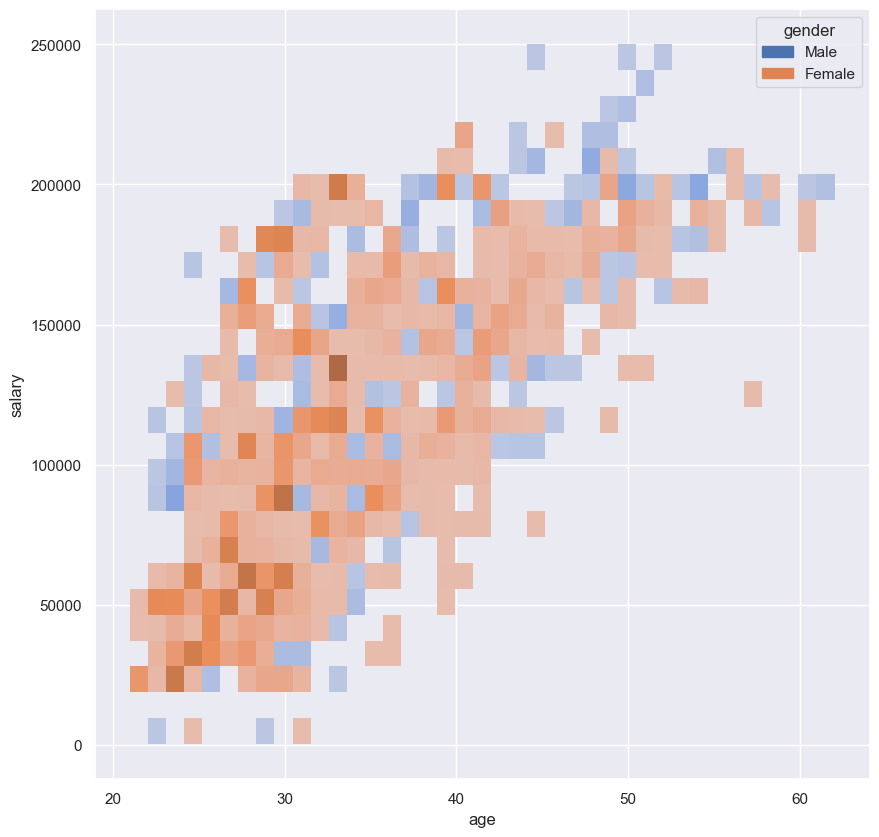

In [40]:
sns.histplot( x = 'age', y = 'salary', hue = 'gender', data=df);

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='gender', ylabel='salary'>

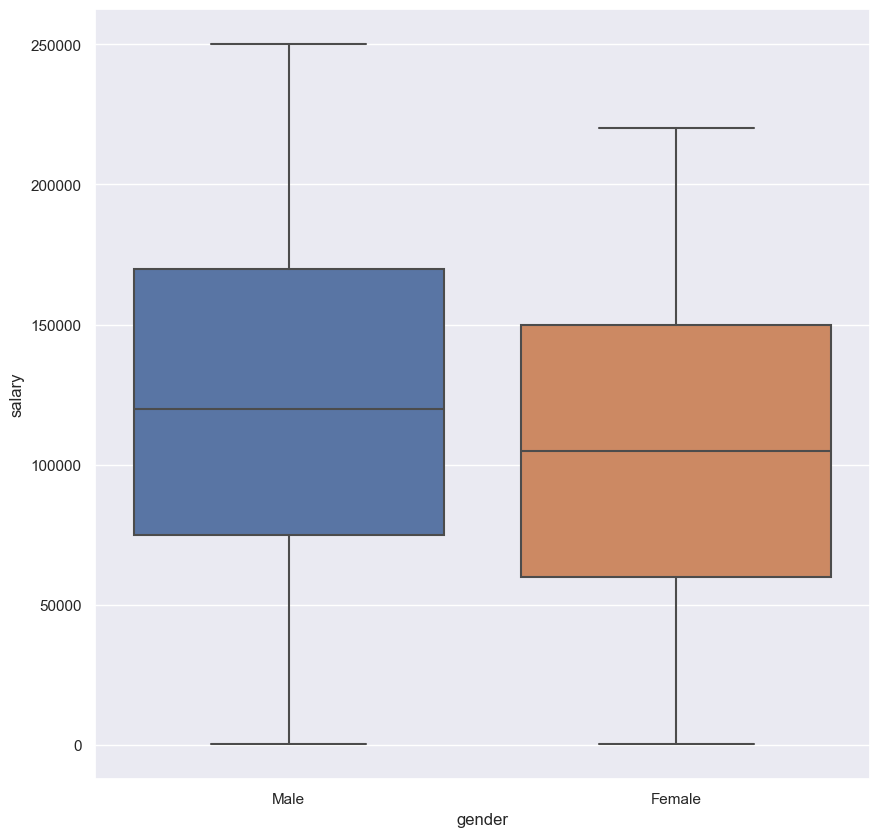

In [41]:
sns.boxplot(x='gender',y='salary',data=df)

In [42]:
df.corr(numeric_only= True)

,age,years_of_experience,salary
age,1.000000,0.937670,0.727984
years_of_experience,0.937670,1.000000,0.809018
salary,0.727984,0.809018,1.000000


In [43]:
#summery statistics for salary based on gender
grouped_data = df.groupby(['gender','education_level'])['salary']
summary_stats = grouped_data.describe() 
summary_stats

count           mean           std       min  \
gender education_level                                                    
Female Bachelor's          284.0  114542.253521  42656.508456   35000.0   
       Bachelor's Degree   914.0   81280.014223  43613.860920     500.0   
       High School         263.0   34825.703422  24541.508378   25000.0   
       Master's            199.0  160201.005025  41134.170698   40000.0   
       Master's Degree     871.0  114214.187141  36831.551930   32000.0   
       PhD                 496.0  160266.292339  30951.384940   55000.0   
Male   Bachelor's          472.0  130920.233051  47971.537458     350.0   
       Bachelor's Degree  1351.0   87809.906736  34170.441880   30000.0   
       High School         185.0   39380.751351  19115.049001   25000.0   
       Master's             89.0  151797.752809  36420.267764   75000.0   
       Master's Degree     701.0  138570.425107  36765.691058   40000.0   
       PhD                 871.0  168926.251435  35473.100960     579.0   
       phD                   1.0  120000.000000           NaN  120000.0   

                               25%       50%       75%       max  
gender education_level                                            
Female Bachelor's          85000.0  120000.0  150000.0  190000.0  
       Bachelor's Degree   55000.0   65000.0   92000.0  215000.0  
       High School         25000.0   26000.0   35000.0  166109.0  
       Master's           140000.0  180000.0  195000.0  198000.0  
       Master's Degree     90000.0  120000.0  135596.0  192756.0  
       PhD                140000.0  165000.0  185000.0  220000.0  
Male   Bachelor's          95000.0  130000.0  180000.0  250000.0  
       Bachelor's Degree   60000.0   80000.0  110000.0  250000.0  
       High School         30000.0   35000.0   40000.0  165919.0  
       Master's           130000.0  170000.0  185000.0  200000.0  
       Master's Degree    110000.0  140000.0  170000.0  228000.0  
       PhD                155000.0  180000.0  190000.0  250000.0  
       phD                120000.0  120000.0  120000.0  120000.0

In [44]:
df.loc[(df['education_level']=='PhD')&(df['salary']<=579.0), 'salary']=180000.0

In [45]:
df.loc[(df['education_level']=='PhD')&(df['salary']==579.0)]

,age,gender,education_level,job_title,years_of_experience,salary


In [46]:
df[df['education_level']=='PhD']['salary'].min()

52612

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

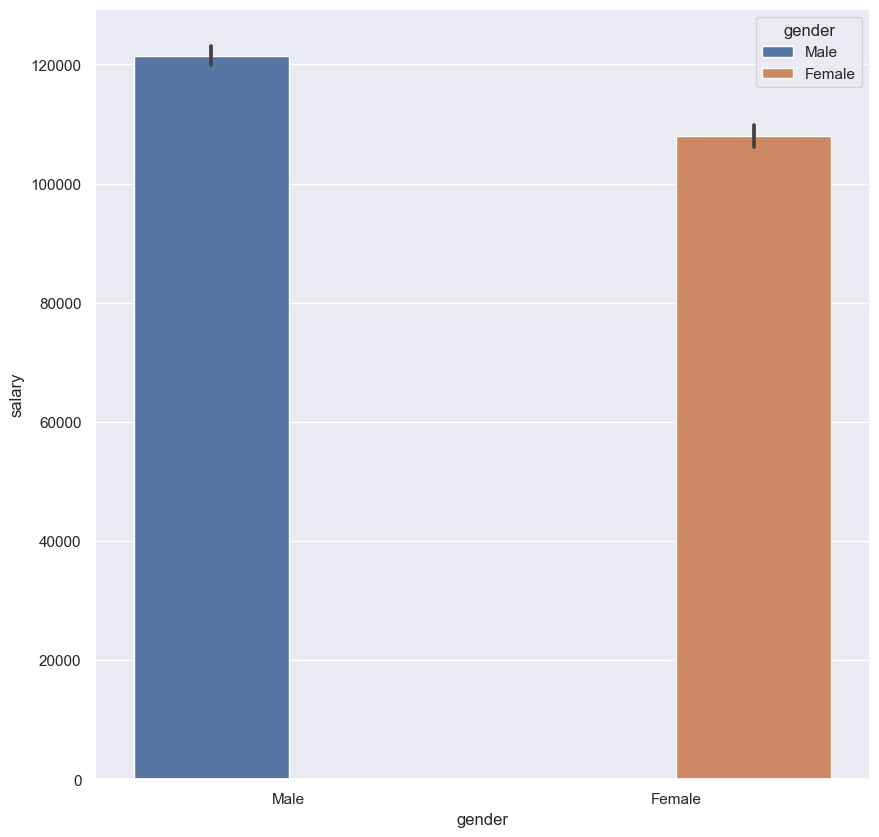

In [47]:
sns.barplot(df, x="gender", y="salary", hue="gender")
plt.show()

In [48]:
df.age.min()

21

In [49]:
df.age.max()

62

In [50]:
#df.age.value_counts()

In [96]:
df.age_groups.value_counts()

age_groups
20-30    2891
31-40    2458
41-50    1159
51-60     182
Name: count, dtype: int64

In [94]:
bins = [20,30,40,50,60]
df['age_groups'] = pd.cut(df['age'],bins, labels = ['20-30','31-40','41-50','51-60'])

In [111]:
age_group = []
def age_group(x):
    if x > 60:
        age_group = '60+'
    elif x > 50 and x <=60:
        age_group = '51-60'
    elif x > 40 and x <= 50:
        age_group = '41-50'
    elif x > 30 and x <= 40:
        age_group = '31-40'
    else:
        age_group = '21-30'
    return age_group

In [112]:
df.age_group = df.age.apply(age_group)

In [113]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,age_group,expeienece_group
0,32,Male,Bachelor's,Software Engineer,5,90000,31-40,31-40,20+
1,28,Female,Master's,Data Analyst,3,65000,20-30,21-30,0_5
2,45,Male,PhD,Senior Manager,15,150000,41-50,41-50,20+
3,36,Female,Bachelor's,Sales Associate,7,60000,31-40,31-40,5_10
4,52,Male,Master's,Director,20,200000,51-60,51-60,20+


C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='age_groups', ylabel='salary'>

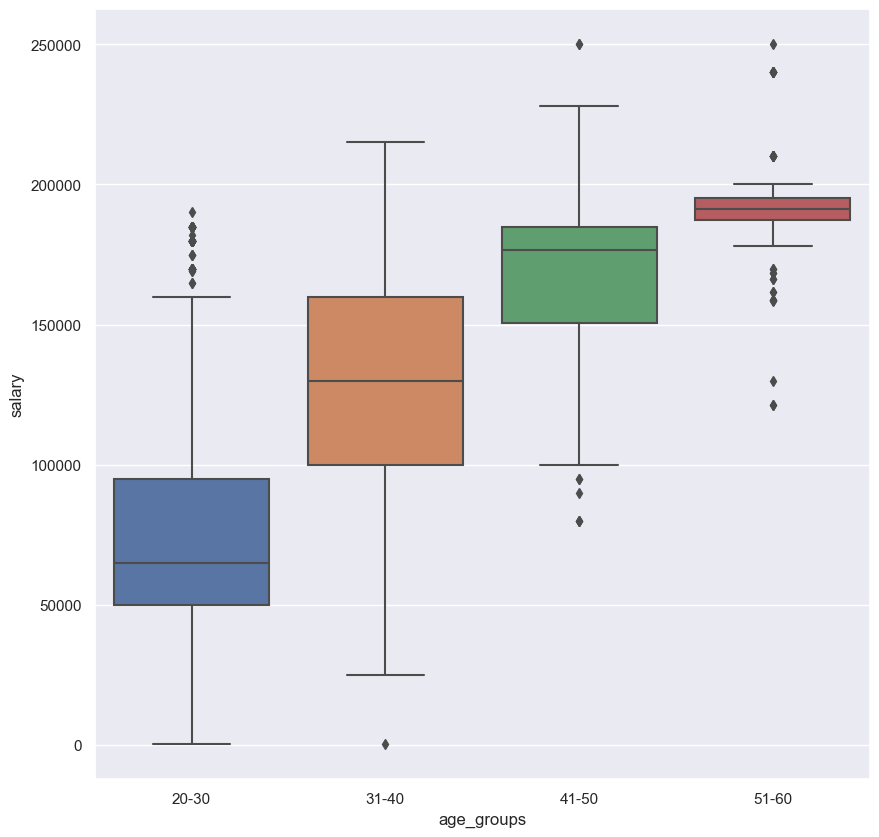

In [117]:
sns.boxplot(x='age_groups', y='salary', data=df)

In [105]:
sorted(set(age_group))

['20-30', '41-50', '51-60', '60+']

In [100]:
df['age_group'] = age_group

In [101]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,age_group,expeienece_group
0,32,Male,Bachelor's,Software Engineer,5,90000,31-40,30-39,20+
1,28,Female,Master's,Data Analyst,3,65000,20-30,20-29,0_5
2,45,Male,PhD,Senior Manager,15,150000,41-50,40-49,20+
3,36,Female,Bachelor's,Sales Associate,7,60000,31-40,30-39,5_10
4,52,Male,Master's,Director,20,200000,51-60,50-59,20+


In [54]:
df.age_group.value_counts()

age_group
20_30    2442
30_40    2366
40_50    1071
60+       641
50_60     177
Name: count, dtype: int64

In [95]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,age_group,expeienece_group
0,32,Male,Bachelor's,Software Engineer,5,90000,31-40,30_40,20+
1,28,Female,Master's,Data Analyst,3,65000,20-30,20_30,0_5
2,45,Male,PhD,Senior Manager,15,150000,41-50,40_50,20+
3,36,Female,Bachelor's,Sales Associate,7,60000,31-40,30_40,5_10
4,52,Male,Master's,Director,20,200000,51-60,50_60,20+


C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of obser

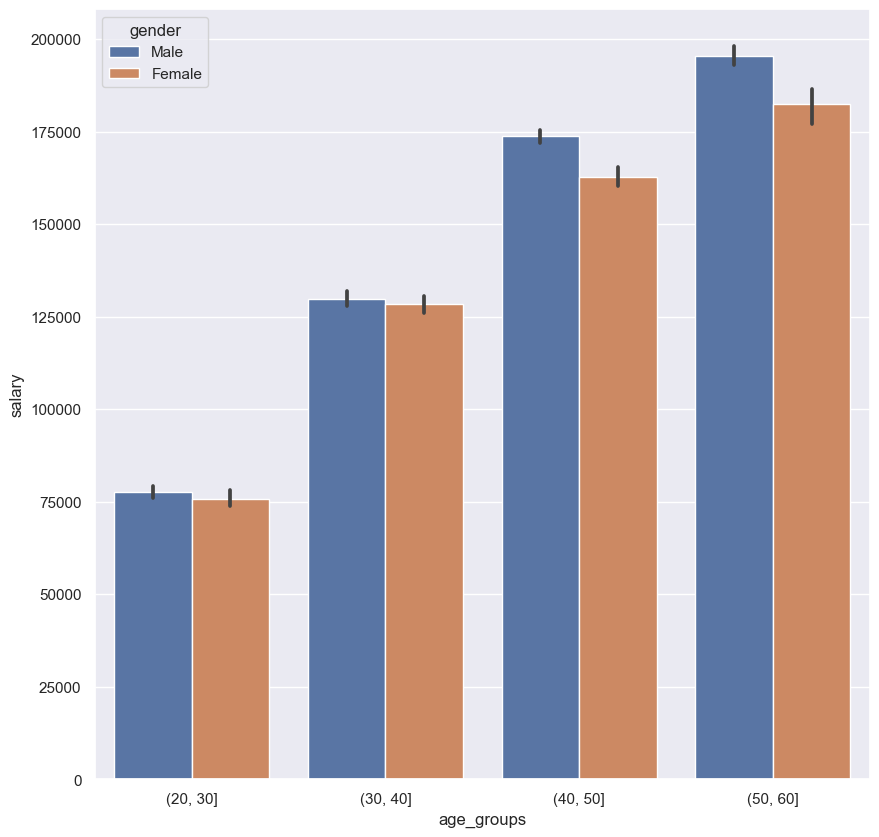

In [56]:
sns.barplot(df, x="age_groups", y="salary",hue="gender")
plt.show()

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='gender', ylabel='salary'>

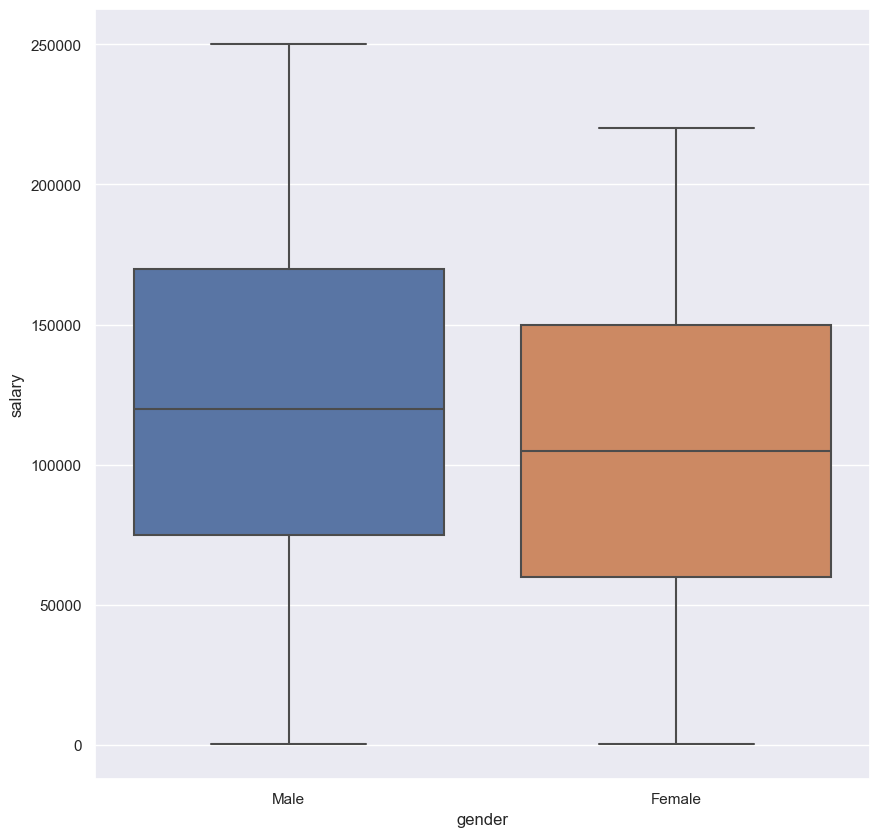

In [57]:
sns.boxplot(x = 'gender',y = 'salary',data= df)

In [58]:
df.head(1)

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,age_group
0,32,Male,Bachelor's,Software Engineer,5,90000,"(30, 40]",30_40


In [59]:
df.loc[df.education_level =="Bachelor's Degree","education_level"]= "Bachelor's"

In [60]:
df.loc[df.education_level =="Master's Degree","education_level"]= "Master's"

In [61]:
df.loc[df.education_level =="phD","education_level"]= "PhD"

In [62]:
df.groupby('gender')['education_level'].value_counts()
          

gender  education_level
Female  Bachelor's         1198
        Master's           1070
        PhD                 496
        High School         263
Male    Bachelor's         1823
        PhD                 872
        Master's            790
        High School         185
Name: count, dtype: int64

In [63]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,6697.0,NaN,NaN,NaN,33.624459,7.615445,21.0,28.0,32.0,38.0,62.0
gender,6697,2,Male,3670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,6697,4,Bachelor's,3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,6697,191,Software Engineer,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_of_experience,6697.0,NaN,NaN,NaN,8.095267,6.061232,0.0,3.0,7.0,12.0,34.0
salary,6697.0,NaN,NaN,NaN,115368.785725,52770.707237,350.0,70000.0,115000.0,160000.0,250000.0
age_groups,6690,4,"(20, 30]",2891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_group,6697,5,20_30,2442,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.head(1)

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,age_group
0,32,Male,Bachelor's,Software Engineer,5,90000,"(30, 40]",30_40


In [65]:
df.salary.describe()

count      6697.000000
mean     115368.785725
std       52770.707237
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: salary, dtype: float64

In [66]:
df[df['education_level']=="PhD"]['salary'].describe()

count      1368.000000
mean     165881.774123
std       33864.202848
min       52612.000000
25%      150000.000000
50%      170000.000000
75%      190000.000000
max      250000.000000
Name: salary, dtype: float64

In [67]:
df[df['education_level']=="PhD"]

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,age_group
2,45,Male,PhD,Senior Manager,15,150000,"(40, 50]",40_50
9,38,Male,PhD,Senior Scientist,10,110000,"(30, 40]",30_40
17,39,Male,PhD,Senior Engineer,12,115000,"(30, 40]",30_40
28,43,Female,PhD,Senior Consultant,15,140000,"(40, 50]",40_50
34,46,Male,PhD,Senior Manager,20,170000,"(40, 50]",40_50
...,...,...,...,...,...,...,...,...
6682,28,Male,PhD,Marketing Manager,4,55000,"(20, 30]",20_30
6685,49,Female,PhD,Senior Product Marketing Manager,20,200000,"(40, 50]",40_50
6691,36,Female,PhD,Marketing Manager,9,95000,"(30, 40]",30_40
6696,28,Male,PhD,Sales Representative,4,55000,"(20, 30]",20_30


In [68]:
grouped_level= df.groupby(['gender','education_level']).size().reset_index(name = 'count')
print(grouped_level)                                                                          

   gender education_level  count
0  Female      Bachelor's   1198
1  Female     High School    263
2  Female        Master's   1070
3  Female             PhD    496
4    Male      Bachelor's   1823
5    Male     High School    185
6    Male        Master's    790
7    Male             PhD    872


C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

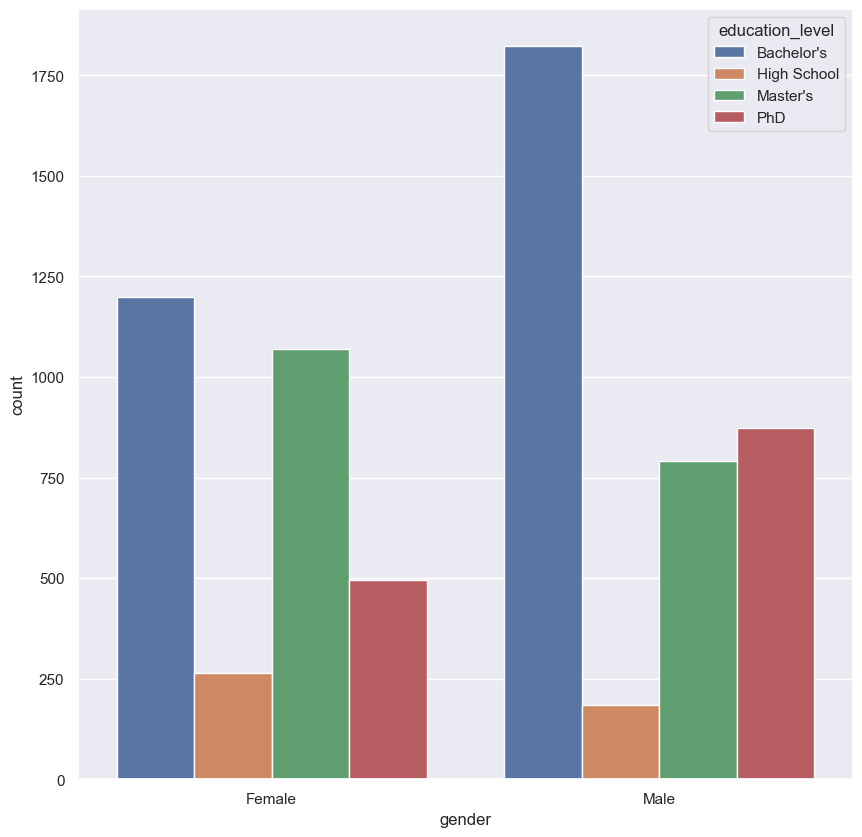

In [69]:
sns.barplot(x = 'gender', y = 'count', hue= 'education_level', data = grouped_level)
plt.show()

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


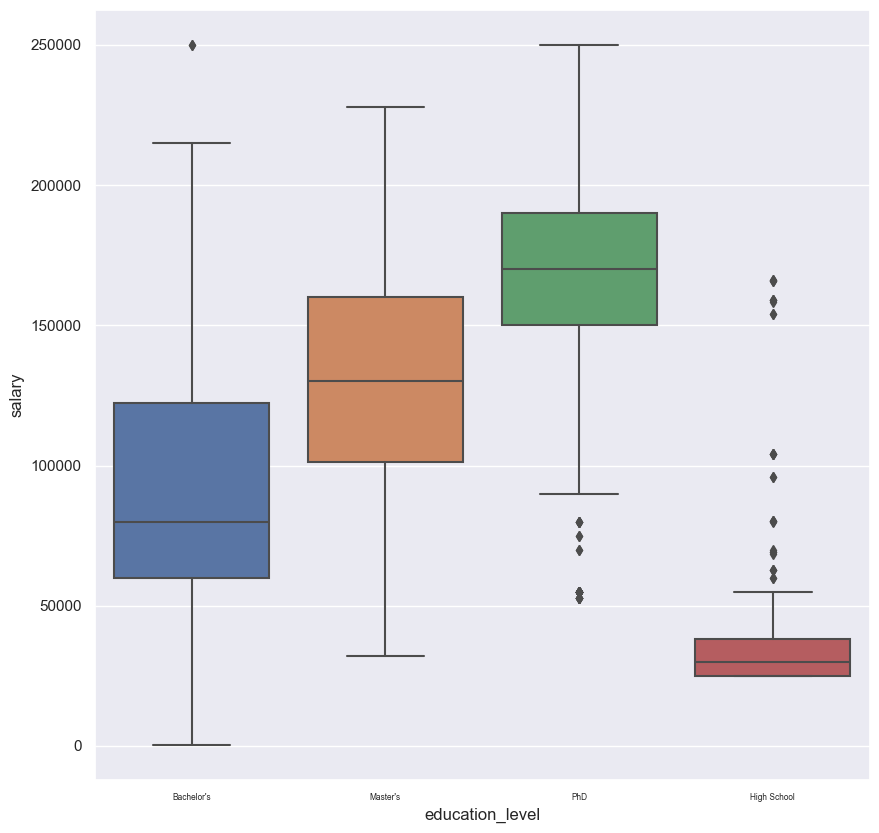

In [70]:
ax= sns.boxplot(x = 'education_level',y = 'salary',data= df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
plt.show()

In [71]:
df[(df['education_level']=="Bachelor's")&(df['salary']>240000)]

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,age_group
30,50,Male,Bachelor's,CEO,25,250000,"(40, 50]",60+
5001,45,Male,Bachelor's,Financial Manager,21,250000,"(40, 50]",40_50


C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

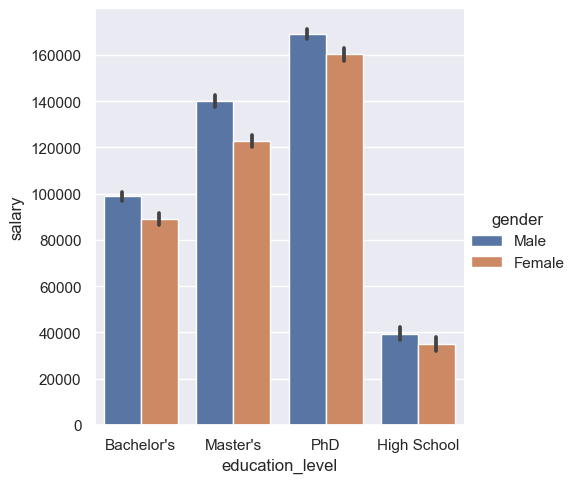

In [72]:
sns.catplot(x = 'education_level', y= 'salary', hue= 'gender', kind = 'bar',estimator= 'mean',data= df)
plt.show()

In [73]:
df['years_of_experience'].unique()

array([ 5,  3, 15,  7, 20,  2, 12,  4,  1, 10, 18,  6, 14, 16,  0, 22, 19,
        9, 13, 11, 25, 21,  8, 17, 23, 24, 31, 30, 28, 33, 27, 34, 29, 26,
       32])

In [129]:
experience_group = []
def experience_group(x):
    if x > 20:
        experience_group = '20+'
    elif x > 15 and x <= 20:
        experience_group = '15-20'
    elif x > 10 and x <= 15:
        experience_group = '10-15'
    elif x > 5 and x <= 10:
        experience_group = '5-10'
    else:
        experience_group = '0-5'
    return experience_group

In [132]:
df['experience_group'] = df.years_of_experience.apply(experience_group)

In [133]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,age_group,expeienece_group,experience_group
0,32,Male,Bachelor's,Software Engineer,5,90000,31-40,31-40,20+,0-5
1,28,Female,Master's,Data Analyst,3,65000,20-30,21-30,0_5,0-5
2,45,Male,PhD,Senior Manager,15,150000,41-50,41-50,20+,10-15
3,36,Female,Bachelor's,Sales Associate,7,60000,31-40,31-40,5_10,5-10
4,52,Male,Master's,Director,20,200000,51-60,51-60,20+,15-20


In [134]:
df.drop('age_group',inplace= True, axis = 1)

In [137]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,experience_group
0,32,Male,Bachelor's,Software Engineer,5,90000,31-40,0-5
1,28,Female,Master's,Data Analyst,3,65000,20-30,0-5
2,45,Male,PhD,Senior Manager,15,150000,41-50,10-15
3,36,Female,Bachelor's,Sales Associate,7,60000,31-40,5-10
4,52,Male,Master's,Director,20,200000,51-60,15-20


In [136]:
df.drop('expeienece_group', inplace = True, axis = 1)

In [76]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary,age_groups,age_group,expeienece_group
0,32,Male,Bachelor's,Software Engineer,5,90000,"(30, 40]",30_40,20+
1,28,Female,Master's,Data Analyst,3,65000,"(20, 30]",20_30,0_5
2,45,Male,PhD,Senior Manager,15,150000,"(40, 50]",40_50,20+
3,36,Female,Bachelor's,Sales Associate,7,60000,"(30, 40]",30_40,5_10
4,52,Male,Master's,Director,20,200000,"(50, 60]",50_60,20+


C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

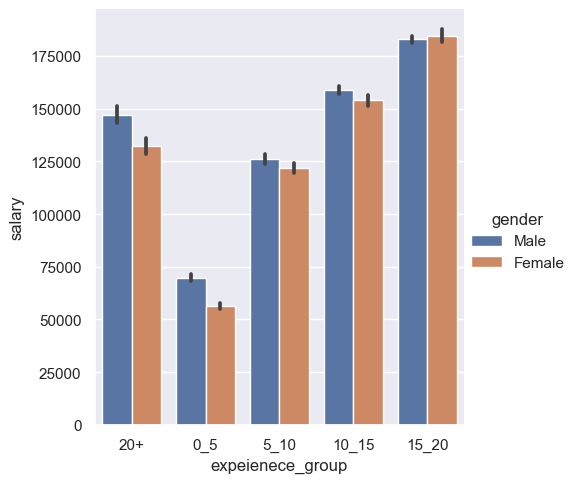

In [77]:
sns.catplot(x = 'expeienece_group', y= 'salary', hue= 'gender', kind = 'bar',estimator= 'mean',data= df)
plt.show()

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

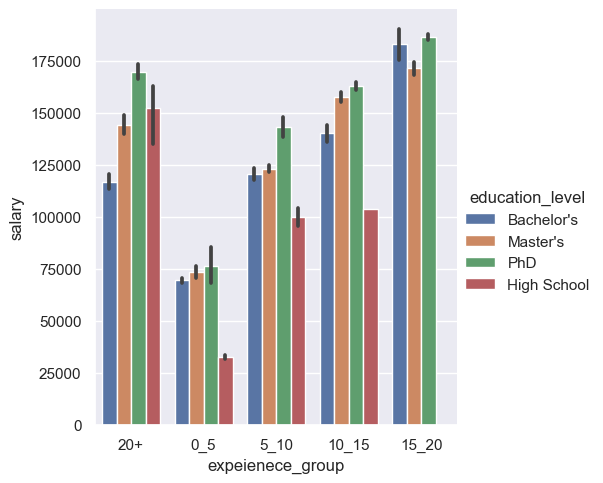

In [78]:
sns.catplot(x = 'expeienece_group', y= 'salary', hue= 'education_level', kind = 'bar',estimator= 'mean',data= df)
plt.show()

In [79]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6697 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  6697 non-null   int32   
 1   gender               6697 non-null   object  
 2   education_level      6697 non-null   object  
 3   job_title            6697 non-null   object  
 4   years_of_experience  6697 non-null   int32   
 5   salary               6697 non-null   int32   
 6   age_groups           6690 non-null   category
 7   age_group            6697 non-null   object  
 8   expeienece_group     6697 non-null   object  
dtypes: category(1), int32(3), object(5)
memory usage: 399.2+ KB


In [81]:
alpha = 0.05

In [82]:
N= 200

In [138]:
male_salary = df[(df['gender']=='Male')&(df['education_level'])]['salary'].sample(N, random_state=42)
female_salary = df[(df['gender']=='Female')&(df['education_level'])]['salary'].sample(N, random_state=42)

C:\Users\samhe\AppData\Local\Temp\ipykernel_16288\2806958727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(male_salary, label='male_salary', kde=False);
C:\Users\samhe\AppData\Local\Temp\ipykernel_16288\2806958727.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_salary, ax=a

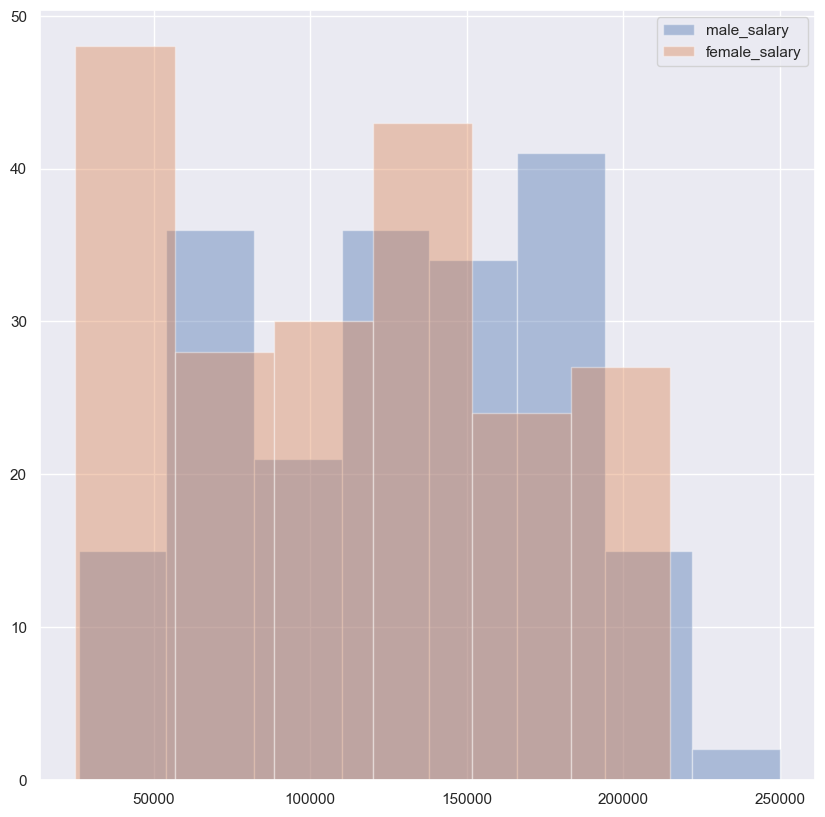

In [139]:
ax = sns.distplot(male_salary, label='male_salary', kde=False);
sns.distplot(female_salary, ax=ax, label='female_salary', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

In [140]:
shapiro_test = stats.shapiro(female_salary)
print(shapiro_test)

ShapiroResult(statistic=0.9489607810974121, pvalue=1.5001467090769438e-06)


In [85]:
# Business Question
#is the average salary different between women and men in the organization?

In [86]:
null_hypothesis = {
    'H0': "there is no significant difference in the effect of education level on salaries between male and female employees."
    , 'H1': "there is significant difference in the effect of education level on salaries between male and female employees."

In [87]:
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [88]:
t2, p2 = stats.ttest_ind(male_salary, female_salary)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2,alpha)

t = 3.1021449032985555
p = 0.0020582058509104034
We reject our null hypothesis.
The average salary of women and men in this organization is different.


In [89]:
statistic, P_value = mannwhitneyu(male_salary, female_salary)
print(f'Mann-Whitney U Statistic:{statistic}')
print(f'P_value:{p_value}')
print_sig(p2,alpha)

Mann-Whitney U Statistic:24517.5
P_value:2.0531371433517634e-25
We reject our null hypothesis.
The average salary of women and men in this organization is different.


In [90]:
# Two_way ANOVA
formula = 'salary ~ education_level + years_of_experience + education_level:years_of_experience'
model = ols(formula, df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

                                           sum_sq      df            F  \
education_level                      9.547392e+11     3.0   401.504184   
years_of_experience                  5.237014e+12     1.0  6607.091093   
education_level:years_of_experience  1.975914e+11     3.0    83.094692   
Residual                             5.301938e+12  6689.0          NaN   

                                            PR(>F)  
education_level                      8.068413e-240  
years_of_experience                   0.000000e+00  
education_level:years_of_experience   8.852564e-53  
Residual                                       NaN  
